# This workbppk is mostly for creating graphs

In [46]:
from standard_imports import *
np.set_printoptions(precision = 15, linewidth=700, suppress=False)
%load_ext autoreload
%autoreload 2

In [3]:
ML = 4
d_vec = np.array([0,0,0])

dat = np.load(file_location(d_vec, ML))
zeta_d = dat['z_d_results']
asymp = dat['asymptotes']
zeros = dat['zeros']
q_2 = dat['q_2']

In [140]:
ML1 = 4
d_vec1 = np.array([1,0,0])

# ML1 = 4
# d_vec1 = np.array([2,0,0])

dat = np.load(file_location(d_vec1, ML1))
zeta_d1 = dat['z_d_results']
asymp1 = dat['asymptotes']
zeros1 = dat['zeros']
q_21 = dat['q_2']

In [130]:
ML2 = 4
d_vec2 = np.array([1,1,0])

dat = np.load(file_location(d_vec2, ML2))
zeta_d2 = dat['z_d_results']
asymp2 = dat['asymptotes']
zeros2 = dat['zeros']
q_22 = dat['q_2']

In [139]:
ML3 = 6
d_vec3 = np.array([1,1,1])
#d_vec3 = np.array([0,0,2])
dat = np.load(file_location(d_vec3, ML3))
zeta_d3 = dat['z_d_results']
asymp3 = dat['asymptotes']
zeros3 = dat['zeros']
q_23 = dat['q_2']

In [132]:
#print all variables

print('zeta = ', zeta_d)
print('asymptotes = ', asymp)
print('zeros = ', zeros)

print('q_2 = ', q_2)


zeta =  [                 inf  -79.419475174292     -40.941215493790835 ...  909.9433830682575   1833.0979402872902                    inf]
asymptotes =  [ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 19. 20. 21. 22.]
zeros =  [ 0.472894248699386  1.441591313657851  2.62700761230748   3.536619947663408  4.251705973624203  5.537700774672     7.196263202615586  8.287953654425843  9.53453142742945  10.55053411627602  11.701495743249124 12.310239181089791 13.383115150471767 15.353737467186152 16.12182533121825  17.532541534431186 18.605393175988226 19.518639372215425 20.403318680414294 21.694417867168394]
q_2 =  [0.000000000000000e+00 3.667277879646608e-03 7.334555759293216e-03 ... 2.199266544424071e+01 2.199633272212035e+01 2.200000000000000e+01]


In [133]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [134]:
import matplotlib as mpl
inline_rc = dict(plt.rcParams)


In [135]:
mpl.style.use('default')

Text(0.5, 1.0, '$Z^{\\bf d}$ vs $q^2$ for ${\\bf {d}}  = [0,0,0]$, $mL = 4$')

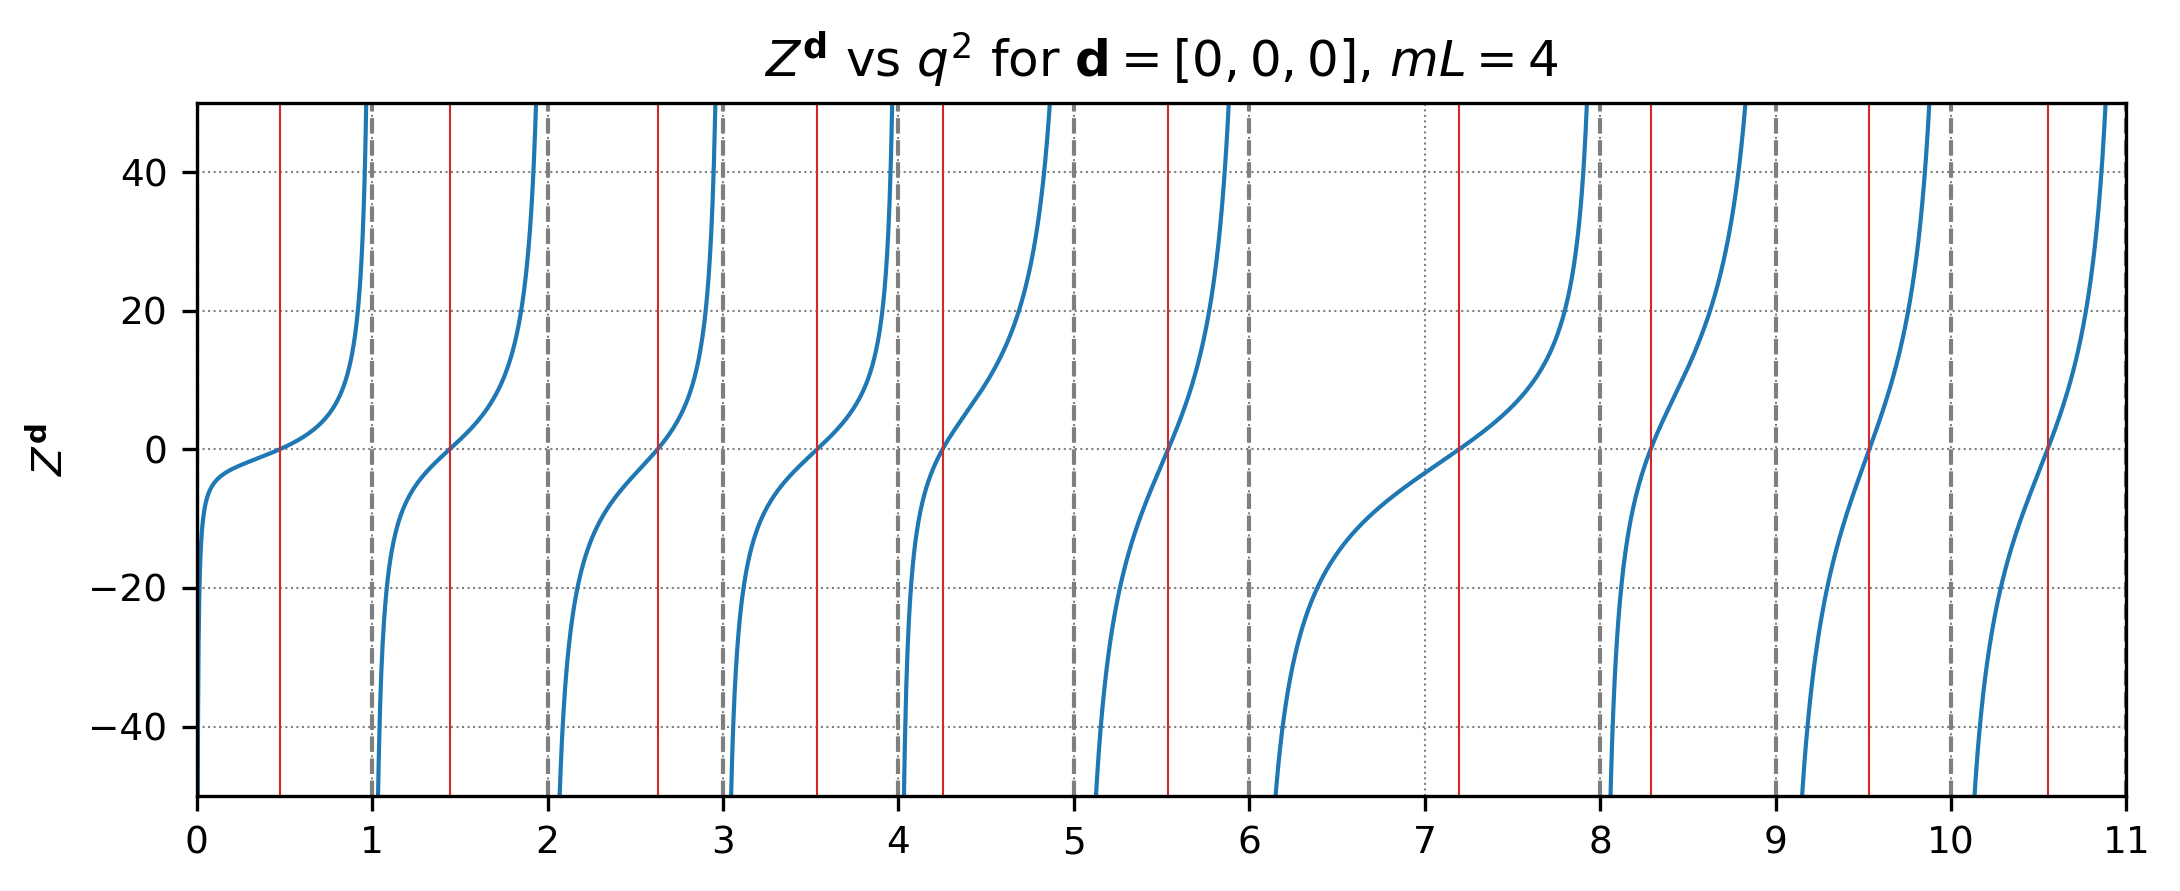

In [136]:


plt.figure(figsize=(8.3,3), dpi=300)
plot_nice(q_2, zeta_d, asymp, zeros, d_vec)
plt.xlim(0, asymp[10])
plt.ylabel('$Z^{\\bf d}$')
plt.title('$Z^{\\bf d}$ vs $q^2$ for ${\\bf {d}}  = [0,0,0]$, $mL = 4$')






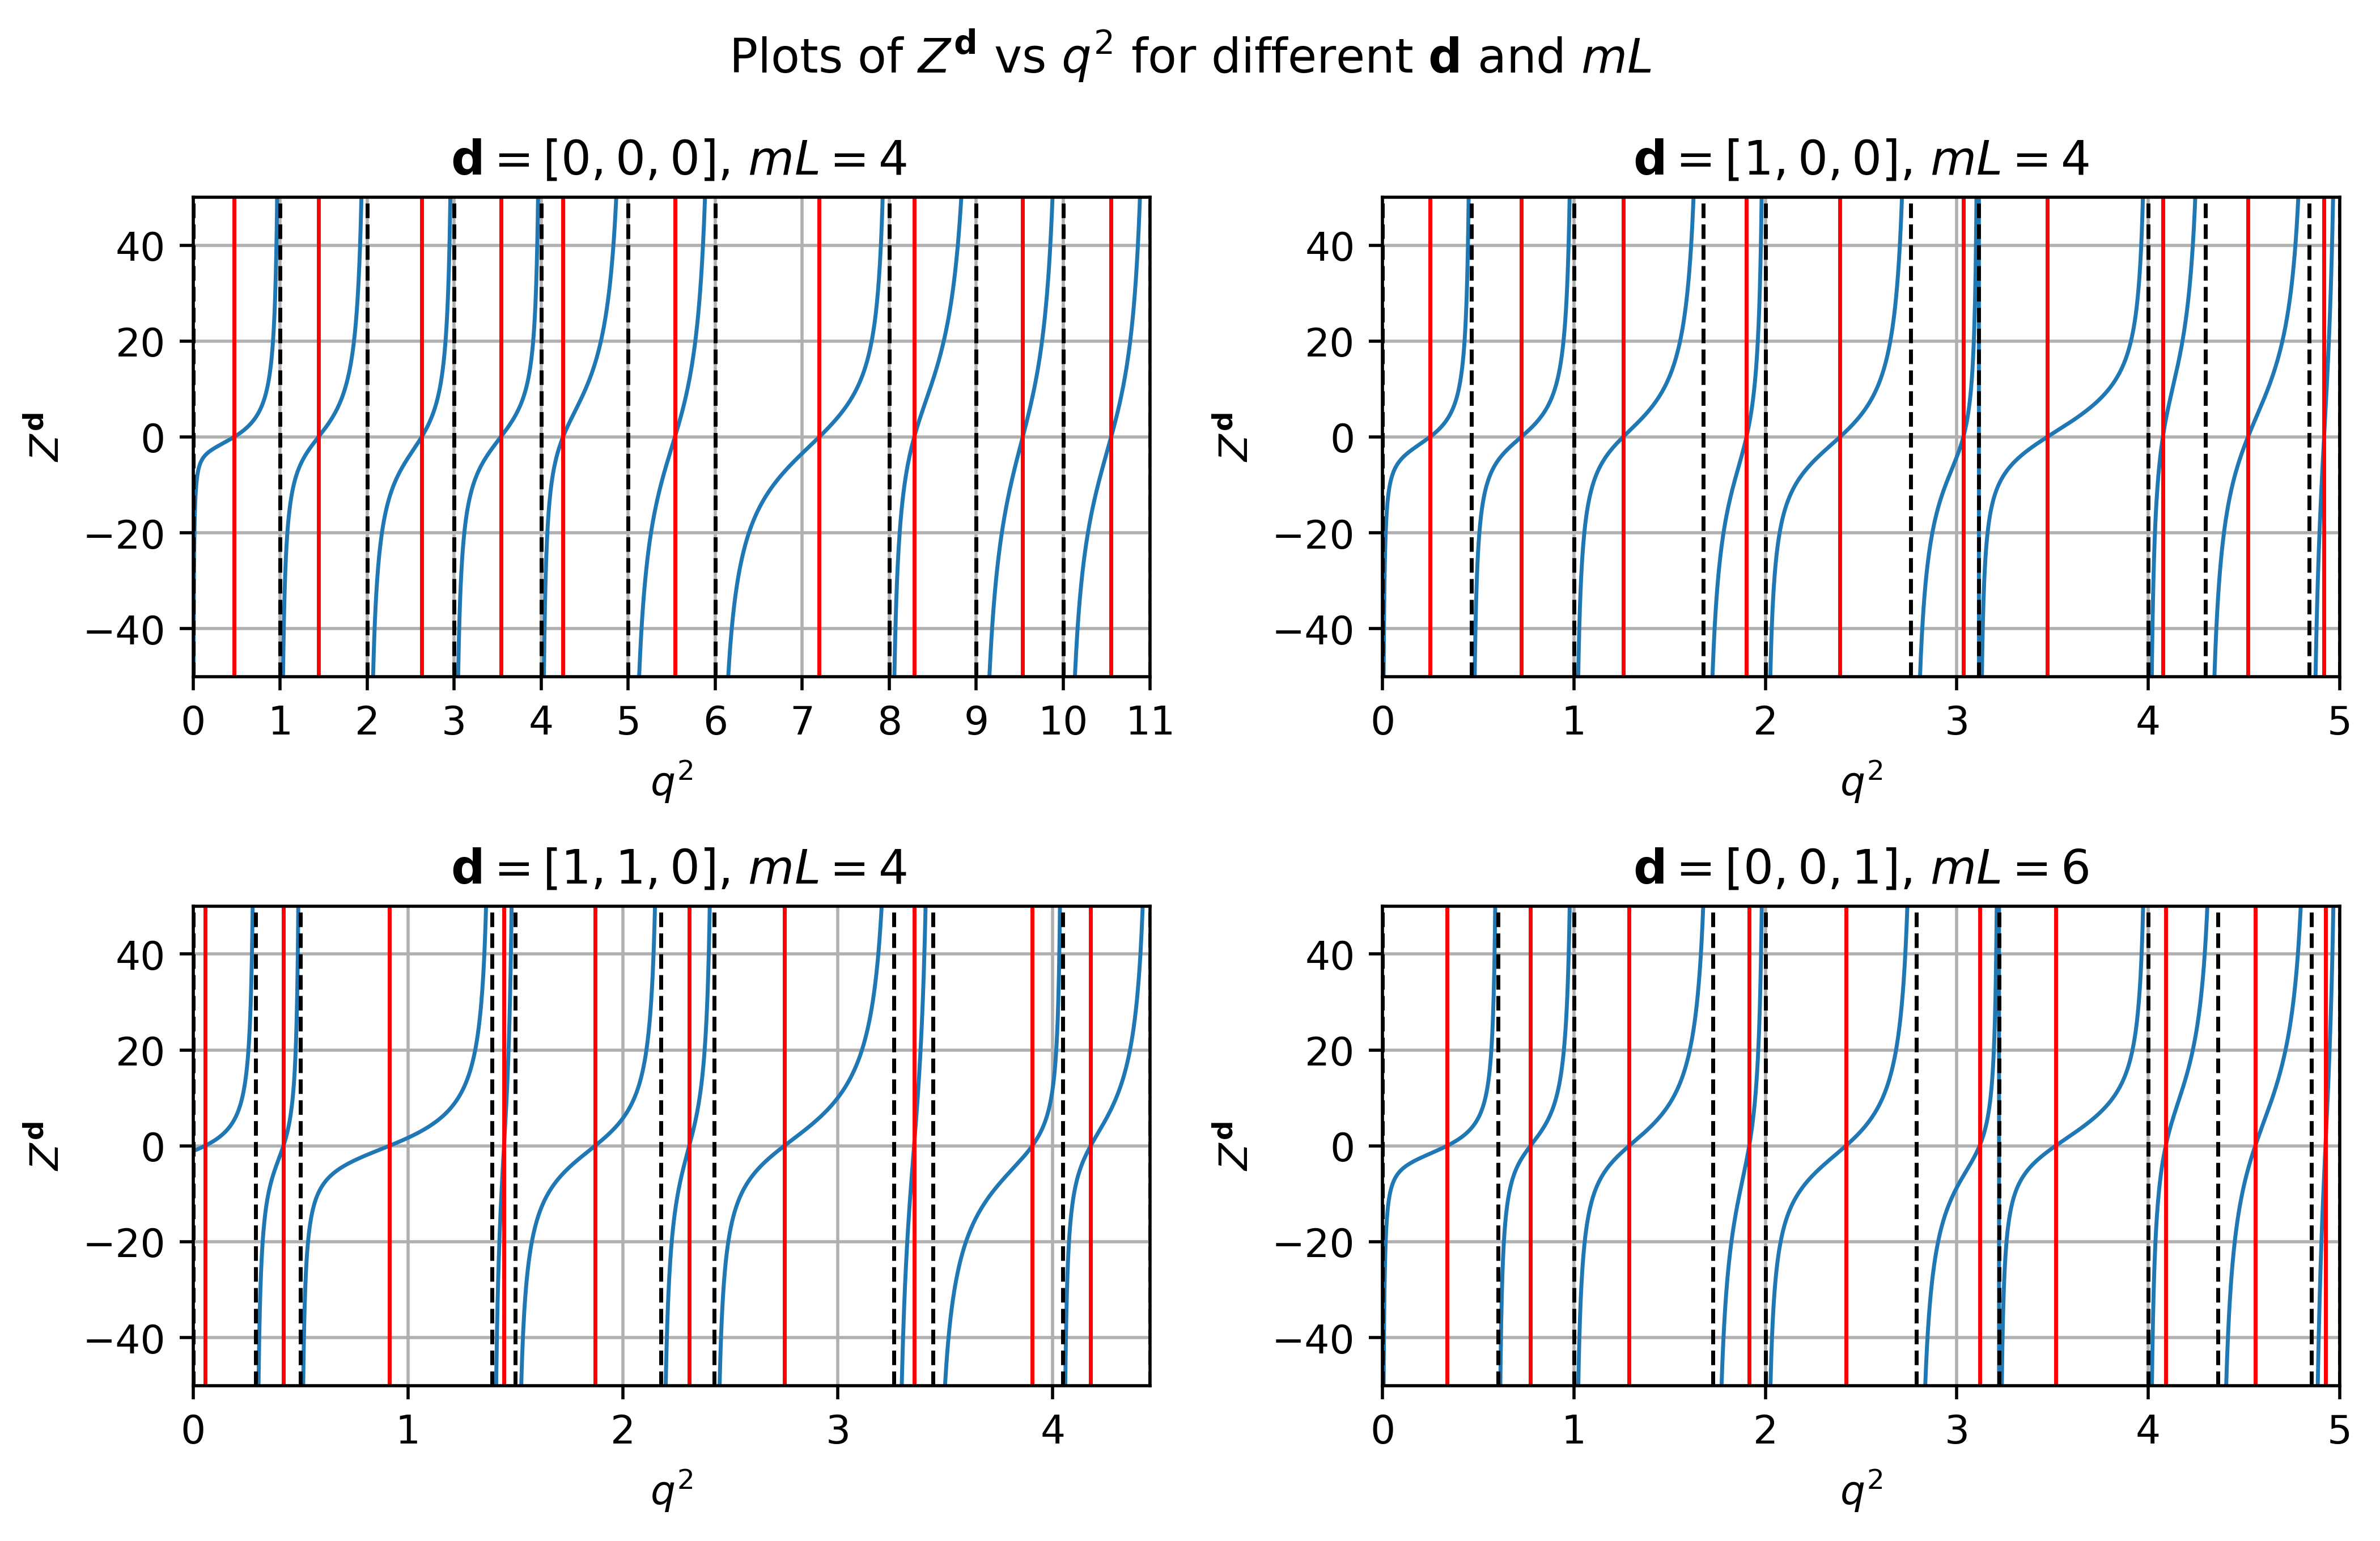

In [137]:
def plot_nice(q_2= np.array([]), z_d_results = np.array([]),asymptotes = np.array([]), zeros = np.array([]),  d_vec = np.array([0,0,1]), ax=None):
    if ax is None:
        ax = plt.gca()
        
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    ###########Creates Plots#####################  

    z_d_plot[np.abs(z_d_plot)>(1e3)] = np.nan

    ax.plot(q_2_plot, z_d_plot, linewidth = 1)
    # #insert first asymptotes with black dotted lines, thickness 1 pt
    for i in first_asymptotes:
        ax.axvline(i, linestyle = "--", color = "black", linewidth = 1, label = "Asymptotes")

    #insert zeros with red dotted lines, thickness 1 pt
    for i in zeros:
        ax.axvline(i, color = "red", linewidth = 1, label = "Zeros")

    ax.set_xlabel("$q^2$", ) 
    ax.set_ylabel("$Z_d$")

    ax.set_xlim(0,first_asymptotes[-1])

    #legend
    handles, labels = ax.get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    #ax.legend(handles, labels, loc='lower right')

    ax.set_ylim(-50,50)
    #tickmarks

    #set x tickmarks, 100
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x/50)
    ax.set_xticks(np.arange(0,max_x, steps))

    ax.grid(True, which='major')




fig, axs = plt.subplots(2, 2, figsize=(8.5,5.5), dpi=500)

# Plot for zeta_d
plot_nice(q_2, zeta_d, asymp, zeros, d_vec, ax=axs[0, 0])
axs[0, 0].set_xlim(0, asymp[10])
axs[0, 0].set_ylabel('$Z^{\\bf d}$')
axs[0, 0].set_title(' ${\\bf {d}}  = [0,0,0]$, $mL = 4$')

# Plot for zeta_d1
plot_nice(q_21, zeta_d1, asymp1, zeros1, d_vec1, ax=axs[0, 1])
axs[0, 1].set_xlim(0, asymp1[10])
axs[0, 1].set_ylabel('$Z^{\\bf d}$')
axs[0, 1].set_title('${\\bf {d}}  = [1,0,0]$, $mL = 4$')

# Plot for zeta_d2
plot_nice(q_22, zeta_d2, asymp2, zeros2, d_vec2, ax=axs[1, 0])
axs[1, 0].set_xlim(0, asymp2[10])
axs[1, 0].set_ylabel('$Z^{\\bf d}$')
axs[1, 0].set_title(' ${\\bf {d}}  = [1,1,0]$, $mL = 4$')

# Plot for zeta_d3
plot_nice(q_23, zeta_d3, asymp3, zeros3, d_vec3, ax=axs[1, 1])
axs[1, 1].set_xlim(0, asymp3[10])
axs[1, 1].set_ylabel('$Z^{\\bf d}$')
axs[1, 1].set_title('$ {\\bf {d}}  = [0,0,1]$, $mL = 6$')

plt.suptitle('Plots of $Z^{\\bf d}$ vs $q^2$ for different ${\\bf d}$ and $mL$')
plt.tight_layout()

plt.show()

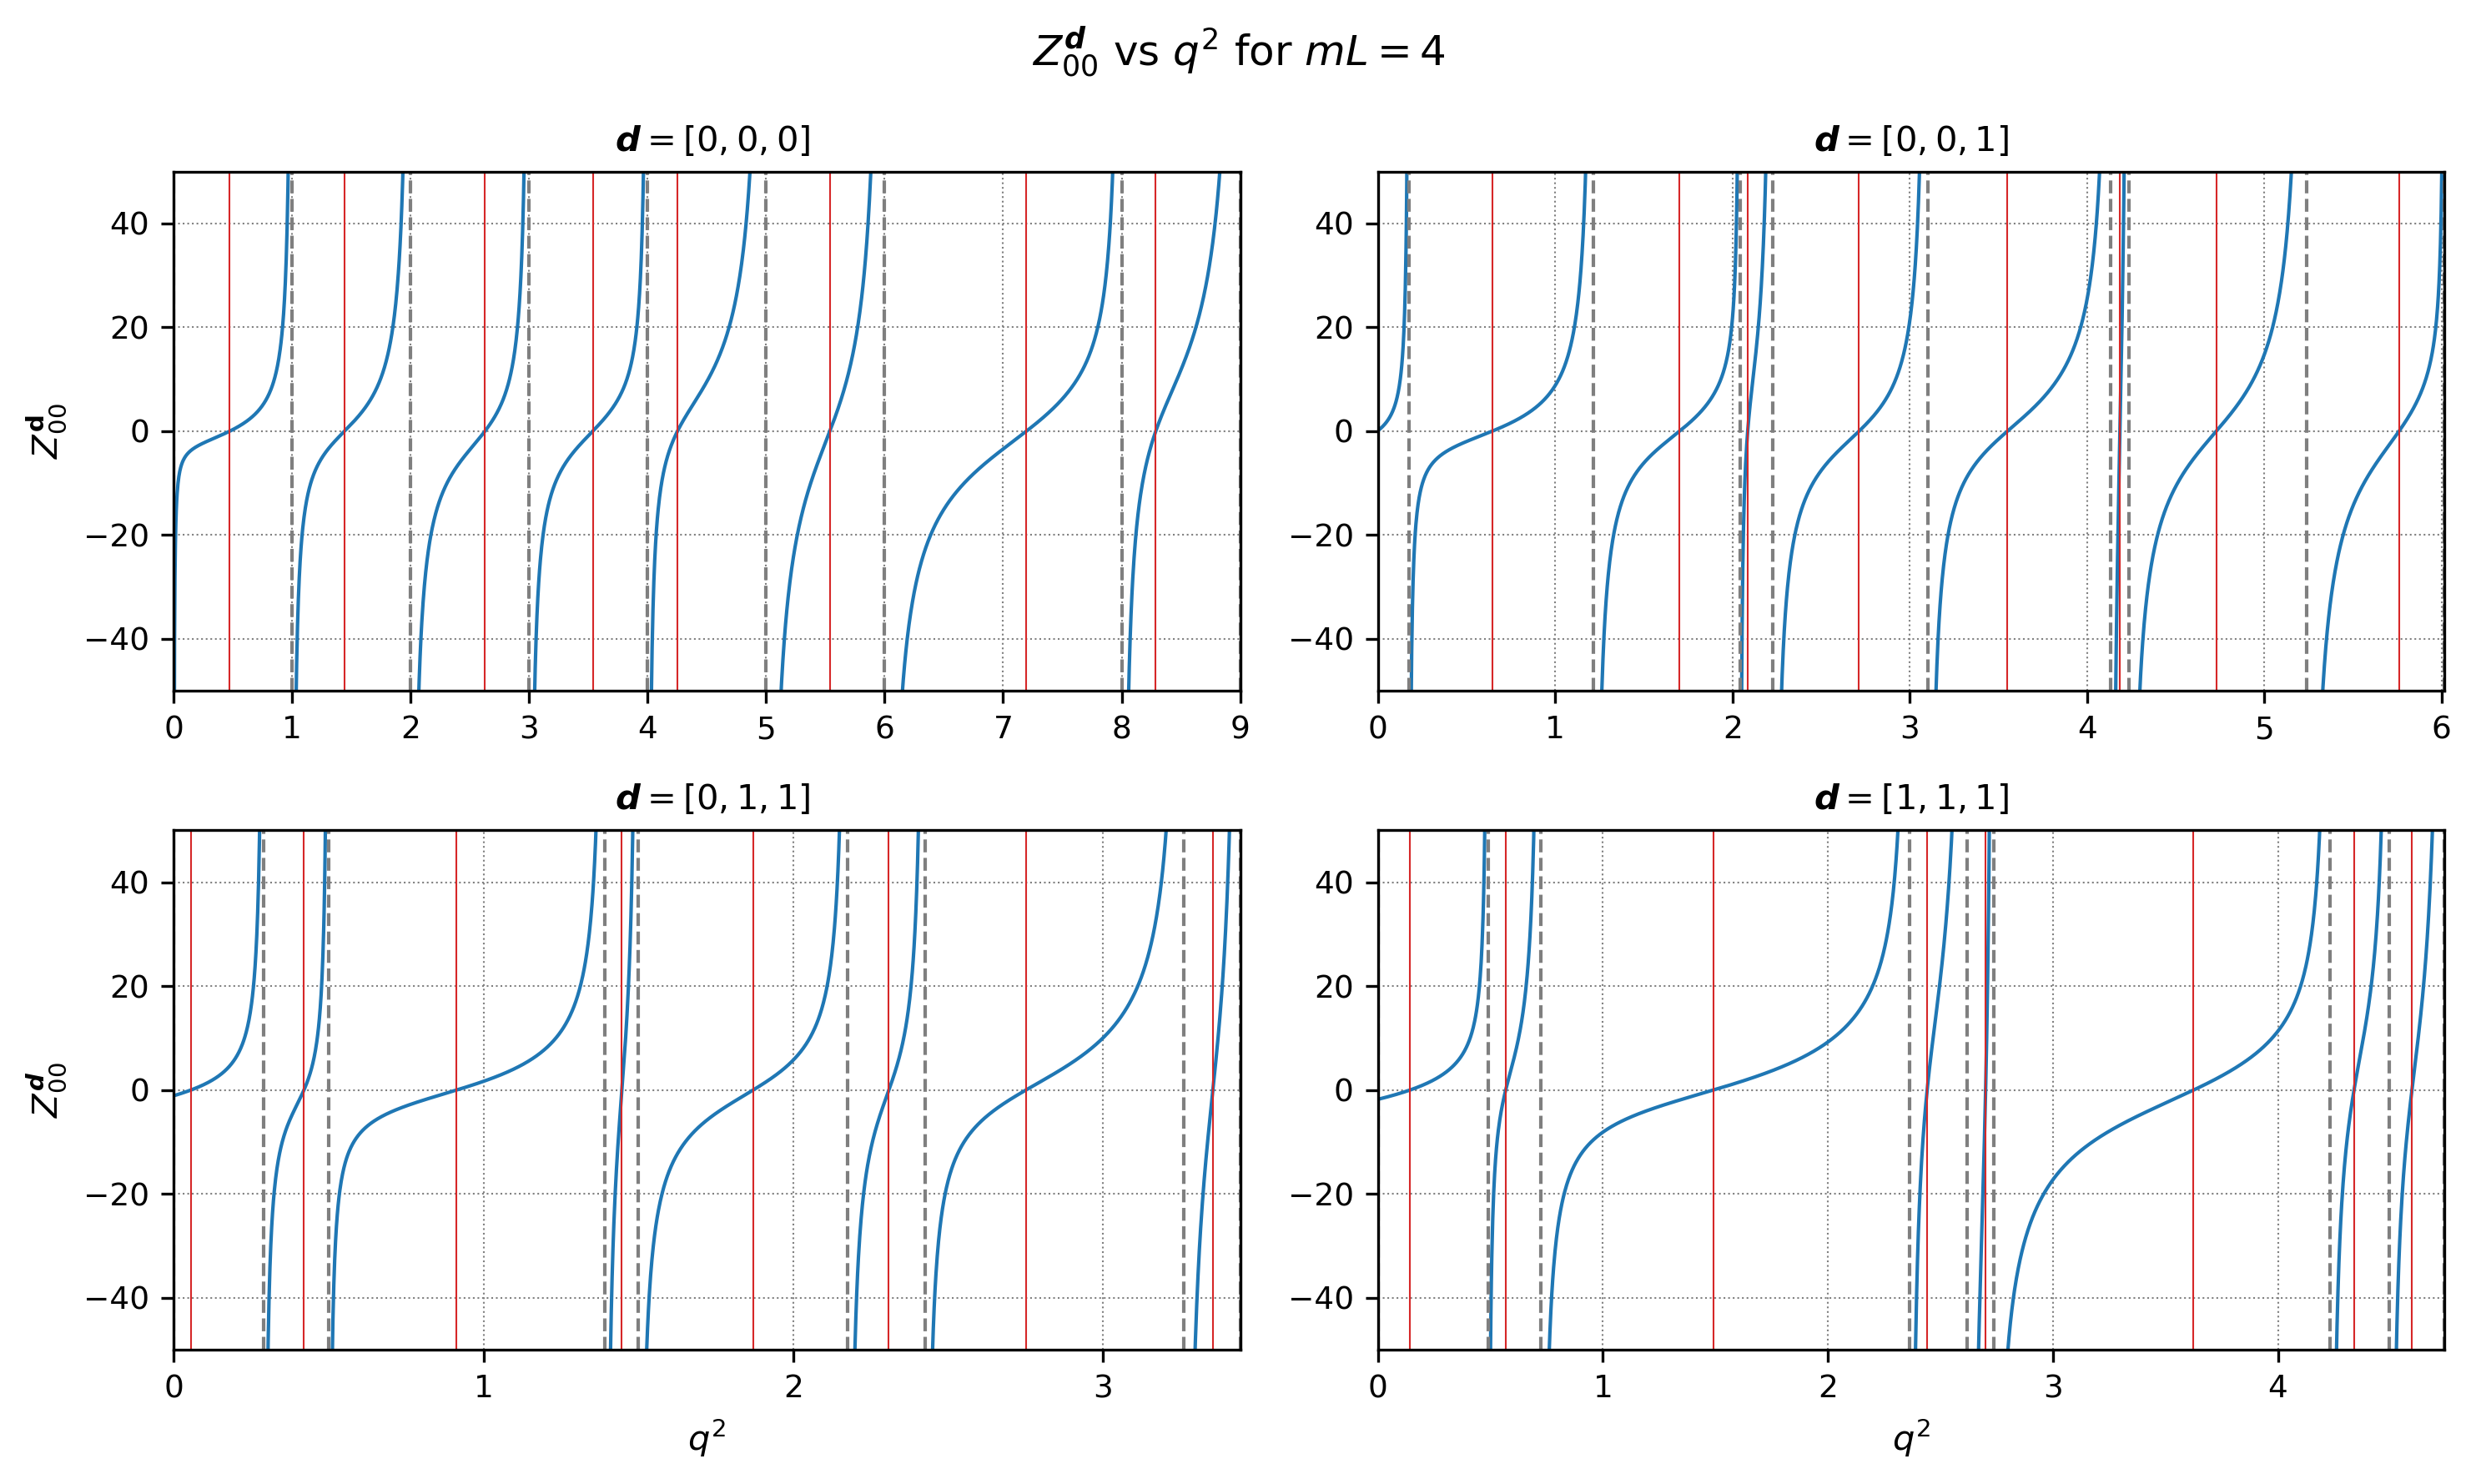

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

def plot_nice(q_2=np.array([]), z_d_results=np.array([]), asymptotes=np.array([]), zeros=np.array([]), d_vec=np.array([0,0,1]), ax=None):
    if ax is None:
        ax = plt.gca()
        
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    
    # Handling extreme values
    z_d_plot[np.abs(z_d_plot) > 3e2] = np.nan

    # Plotting the main curve
    ax.plot(q_2_plot, z_d_plot, linewidth=1, label="$Z_d$ curve", color = 'tab:blue')
    
    # Asymptotes
    for i in first_asymptotes:
        ax.axvline(i, linestyle="--", color = 'tab:grey', linewidth=1, label="Asymptote" if i == first_asymptotes[0] else "")
    
    # Zeros
    for i in zeros:
        ax.axvline(i, color = 'tab:red', linewidth=0.5,  label="Zero" if i == zeros[0] else "")

    # Labels and limits
    #ax.set_xlabel("$q^2$", fontsize=12) 
    #ax.set_ylabel("$Z_d$", fontsize=12)
    ax.set_xlim(0, first_asymptotes[-1])
    ax.set_ylim(-50, 50)

    # Tick marks
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x / 50)
    ax.set_xticks(np.arange(0, max_x, steps))
    ax.tick_params(axis='both', which='major', labelsize=9)

    # Grid and legend
    ax.grid(True, which='major', linestyle=':', linewidth='0.5', color='grey')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Removing duplicates
    #ax.legend(by_label.values(), by_label.keys(), fontsize=9, loc='upper right')

    # Title (optional, depending on use case)
    # ax.set_title("Title Here", fontsize=14)

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(10, 6), dpi=300)
plt.subplots_adjust(hspace=0.3, wspace=0.3, right=0.75) 

# Plot for zeta_d
plot_nice(q_2, zeta_d, asymp, zeros, d_vec, ax=axs[0, 0])
axs[0, 0].set_xlim(0, asymp[8])
axs[0, 0].set_ylabel('$Z_{{00}}^{\\bf d}$')
axs[0, 0].set_title(' ${\\boldsymbol{d}}  = [0,0,0]$', fontsize=10)

# Plot for zeta_d1
plot_nice(q_21, zeta_d1, asymp1, zeros1, d_vec1, ax=axs[0, 1])
axs[0, 1].set_xlim(0, asymp1[8])
#axs[0, 1].set_ylabel('$Z^{\\bf d}$')
axs[0, 1].set_title('${\\boldsymbol{d}}  = [0,0,1]$', fontsize=10)

# Plot for zeta_d2
plot_nice(q_22, zeta_d2, asymp2, zeros2, d_vec2, ax=axs[1, 0])
axs[1, 0].set_xlim(0, asymp2[8])
axs[1, 0].set_ylabel('$Z_{{00}}^{\\boldsymbol{d}}$')
axs[1, 0].set_xlabel("$q^2$") 
axs[1, 0].set_title(' ${\\boldsymbol{d}}  = [0,1,1]$', fontsize=10)

# Plot for zeta_d3
plot_nice(q_23, zeta_d3, asymp3, zeros3, d_vec3, ax=axs[1, 1])
axs[1, 1].set_xlim(0, asymp3[8])
#axs[1, 1].set_ylabel('$Z^{\\bf d}$')
axs[1, 1].set_xlabel("$q^2$") 
axs[1, 1].set_title('$ {\\boldsymbol{d}}  = [1,1,1]$', fontsize=10)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=2),
                Line2D([0], [0], color='tab:grey', lw=1, linestyle='--', label='Asymptote'),
                Line2D([0], [0], color='tab:red', lw=0.5, label='Zero')]

# Place a single legend outside the subplots
#fig.legend(custom_lines, ['$Z_d$ curve', 'Asymptote', 'Zero'], loc='center left', ncol=1, bbox_to_anchor=(1, 0.5), fontsize=12)


plt.suptitle('$Z_{{00}}^{\\boldsymbol{d}}$ vs $q^2$ for $mL = 4$')
plt.tight_layout()

plt.show()

In [55]:
import numpy as np
from tqdm import tqdm
from derivative import *


ML =4 
d_vec = np.array([0,0,0])   
alpha = 1e-3

n_max = 2


f = lambda alpha, gamma: (30/alpha)*gamma**2




xs = np.linspace(0.01, 9, 500)
firsts = np.zeros((len(xs),n_max))
for i in tqdm(range(len(xs))):
    gamma = np.sqrt(1 + np.linalg.norm(d_vec)**2/( (ML/np.pi**2 + 4 * xs[i])))
    firsts[i] = derivative(n_max, d_vec, xs[i],alpha, f(alpha, gamma) )[0]



np.save('derivative_graph_000.npy', firsts)


ML =4 
d_vec = np.array([0,0,1])   
alpha = 1e-3

n_max = 2


f = lambda alpha, gamma: (30/alpha)*gamma**2




xs = np.linspace(0.01, 6.015779500086, 500)
firsts = np.zeros((len(xs),n_max))
for i in tqdm(range(len(xs))):
    gamma = np.sqrt(1 + np.linalg.norm(d_vec)**2/( (ML/np.pi**2 + 4  *xs[i])))
    firsts[i] = derivative(n_max, d_vec, xs[i],alpha, f(alpha, gamma) )[0]


np.save('derivative_graph_001.npy', firsts)


  2%|▏         | 9/500 [00:13<12:34,  1.54s/it]


KeyboardInterrupt: 

In [54]:
f = lambda alpha, gamma: (30/alpha)*gamma**2




xs = np.linspace(0.01, 9, 500)
firsts = np.zeros((len(xs),n_max))
for i in tqdm(range(len(xs))):
    gamma = np.sqrt(1 + np.linalg.norm(d_vec)**2/( (ML/np.pi**2 + 4 * xs[i])))
    firsts[i] = derivative(n_max, d_vec, xs[i],alpha, f(alpha, gamma) )[0]

 28%|██▊       | 110/400 [02:39<07:01,  1.45s/it]


KeyboardInterrupt: 

In [ ]:
np.save('derivative_graph_000.npy', firsts)

In [ ]:
ML =4 
d_vec = np.array([0,0,1])   
alpha = 1e-3

n_max = 2


In [ ]:


xs = np.linspace(0.01, 6.015779500086, 500)
firsts = np.zeros((len(xs),n_max))
for i in tqdm(range(len(xs))):
    gamma = np.sqrt(1 + np.linalg.norm(d_vec)**2/( (ML/np.pi**2 + xs[i])))
    firsts[i] = derivative(n_max, d_vec, xs[i],alpha, f(alpha, gamma) )[0]

In [ ]:
np.save('derivative_graph_001.npy', firsts)

In [16]:
from scipy.special import hyp1f1

from math import gamma as gam_f

def Integrals(a,b,x, alpha):
    '''
    This returns the value of the PV integral for an arbitrary value of a and b.
    Expression obtained using Mathematica; results cross-checked.
    '''
    prefactor = ((-1)**(a + b) * np.exp(x * alpha) * np.pi * alpha**(-0.5 + a - b)) / (2 * (3 + 2 * b))
    term1 = (3 + 2 * b - 2 * x * alpha) * hyp1f1(3 + a, 0.5 + a - b, -x * alpha) / gam_f(0.5 + a - b)
    term2 = x * alpha * (7 + 2 * a + 2 * b - 2 * x * alpha) * hyp1f1(3 + a, 1.5 + a - b, -x * alpha) / gam_f(1.5 + a - b)
    result = prefactor * (term1 + term2)
    angular = 4*np.pi/(2*b+1)
    return result#*angular

In [236]:
x = np.linspace(0.01, 30, 300)

alpha = np.logspace(-1, -4, 300)
a = 1
b  = 1



In [237]:
#make 3d plot of integrals for a = 1, b = 1

#make graph pop out
%matplotlib qt

X, Y = np.meshgrid(x, alpha)
Z = Integrals(a,b,X,Y)



NameError: name 'X' is not defined

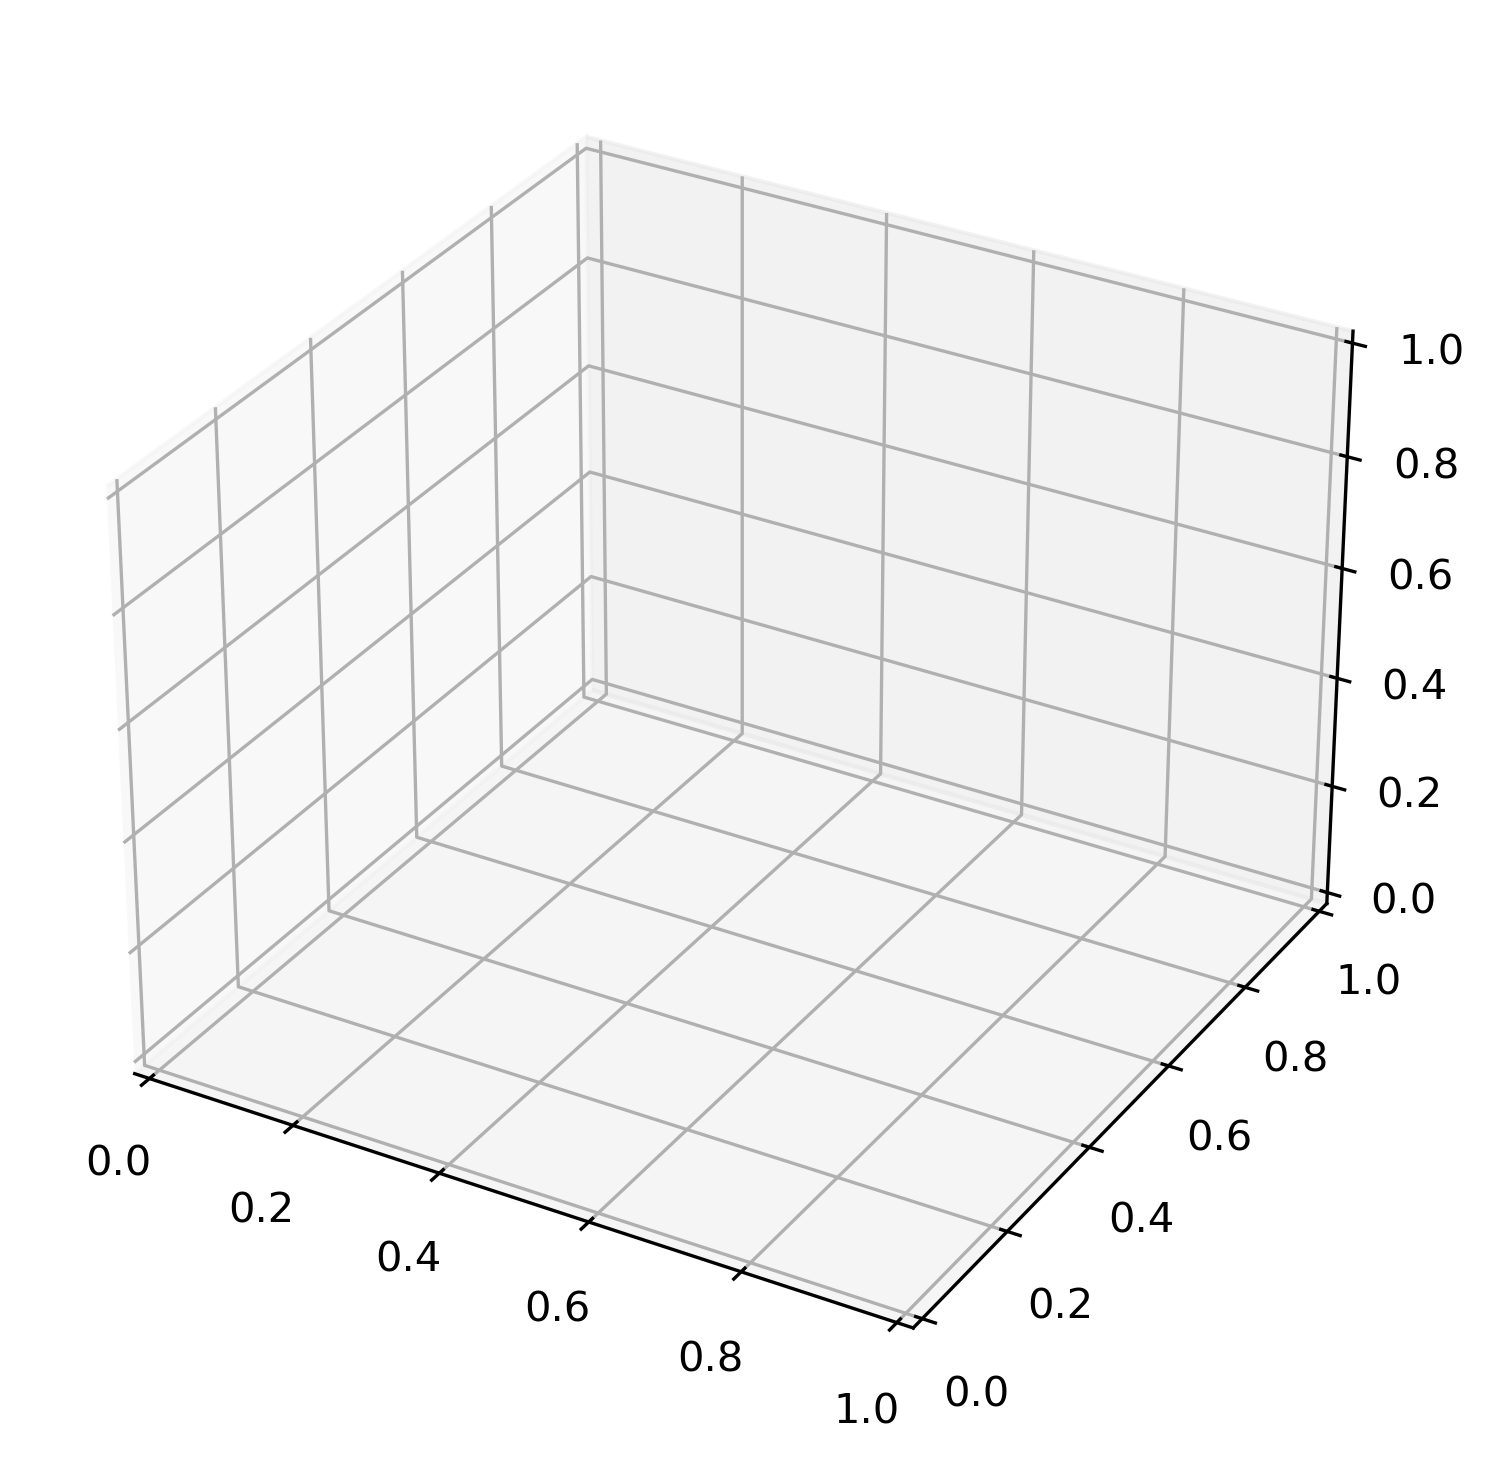

In [2]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, np.log10(Y), Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('alpha')
ax.set_zlabel('Integral')
plt.title('Integral for a = {}, b = {}'.format(a,b))
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Define the function as before
def f(r, alpha, x, epsilon, a, b):
    numerator = np.exp(-alpha * (r**2 - x))
    denominator = (r**2 - x - 1j*epsilon)**(a + 1)
    r_term = r**(2*b + 2)
    return numerator / denominator * r_term

# Define the parameters (except epsilon)
alpha = 0.1
x = 1.0
a = 1.0
b = 1.0

# Define the range of r values
r_values = np.linspace(0.1, 5, 400)

# Define a function to plot for a given epsilon
def plot_for_epsilon(epsilon=0.1):
    real_parts = [np.real(f(r, alpha, x, epsilon, a, b)) for r in r_values]
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, real_parts, label=f'Real part of f(r), epsilon={epsilon}')
    plt.xlabel('r')
    plt.ylabel('Real part of f(r)')
    plt.title('Real Part of the Function')
    plt.legend()
    plt.grid(True)
    plt.show()



# Create an interactive widget
epsilon_slider = FloatSlider(value=0.1, min=0.0001, max=1.0, step=0.01, description='Epsilon:')
interact(plot_for_epsilon, epsilon=epsilon_slider)


interactive(children=(FloatSlider(value=0.1, description='Epsilon:', max=1.0, min=0.0001, step=0.01), Output()…

<function __main__.plot_for_epsilon(epsilon=0.1)>

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Define the function as before
def f(r, alpha, x, epsilon, a, b):
    numerator = np.exp(-alpha * (r**2 - x))
    denominator = (r**2 - x - 1j*epsilon)**(a + 1)
    r_term = r**(2*b + 2)
    return numerator / denominator * r_term

# Parameters
alpha = 1.0
x = 5
a = 1.0
b = 1.0
r_values = np.linspace(0.1, 5, 400)

# Function to integrate
def real_part_of_f_to_integrate(r, alpha, x, epsilon, a, b):
    return np.real(f(r, alpha, x, epsilon, a, b))

# Plotting function
def plot_with_integral(epsilon=0.1):
    # Calculate real part of the function
    real_parts = [np.real(f(r, alpha, x, epsilon, a, b)) for r in r_values]
    
    # Calculate the integral of the real part from 0 to end
    integral_result, _ = quad(real_part_of_f_to_integrate, 0, r_values[-1], args=(alpha, x, epsilon, a, b))
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot the function
    plt.plot(r_values, real_parts, label=f'Real part of f(r), epsilon={epsilon:.2f}')
    plt.xlabel('r')
    plt.ylabel('Real part of f(r)')
    
    # Indicate the integral value on the plot
    plt.axhline(integral_result, color='red', linestyle='--', label=f'Integral (0 to {r_values[-1]:.4f}) = {integral_result:.2f}')
    
    plt.title('Function and Its Integral')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive slider
epsilon_slider = FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Epsilon:')
interact(plot_with_integral, epsilon=epsilon_slider)


interactive(children=(FloatSlider(value=0.1, description='Epsilon:', max=1.0, min=0.01, step=0.01), Output()),…

<function __main__.plot_with_integral(epsilon=0.1)>

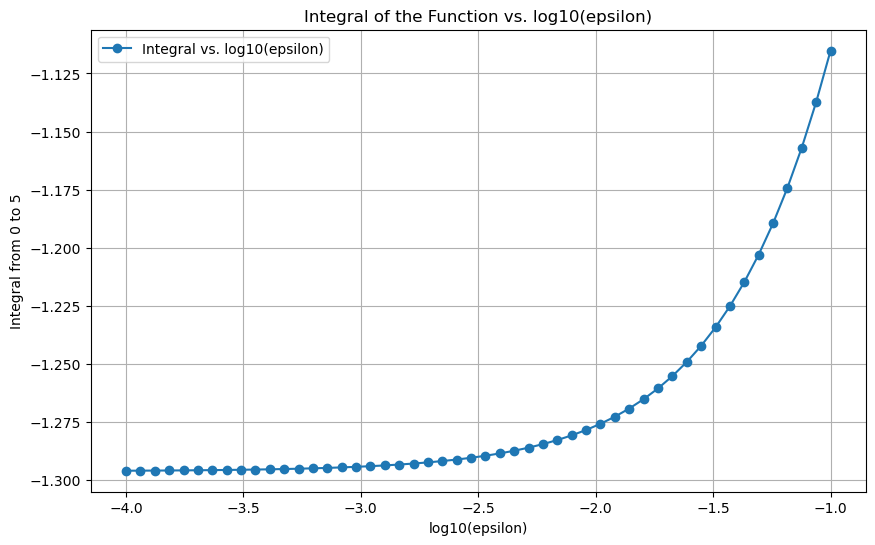

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the function as before
def f(r, alpha, x, epsilon, a, b):
    numerator = np.exp(-alpha * (r**2 - x))
    denominator = (r**2 - x - 1j*epsilon)**(a + 1)
    r_term = r**(2*b + 2)
    return numerator / denominator * r_term

# Function to integrate (real part)
def real_part_of_f_to_integrate(r, alpha, x, epsilon, a, b):
    return np.real(f(r, alpha, x, epsilon, a, b))

# Parameters
alpha = 1
x = 1.0
a = 1.0
b = 1.0

# Epsilon values and their logarithms
epsilon_values = np.logspace(-4, -1, 50)  # Logarithmically spaced epsilon values
log_epsilon_values = np.log10(epsilon_values)

# Integral results
integral_results = []

for epsilon in epsilon_values:
    integral_result, _ = quad(real_part_of_f_to_integrate, 0, 12, args=(alpha, x, epsilon, a, b))
    integral_results.append(integral_result)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_epsilon_values, integral_results, '-o', label='Integral vs. log10(epsilon)')
plt.xlabel('log10(epsilon)')
plt.ylabel('Integral from 0 to 5')
plt.title('Integral of the Function vs. log10(epsilon)')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
print(Integrals(1,1,1,0.1))

1.9758538324319737
